In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 4.5 MB/s            


In [75]:
!pip install gapminder
!pip install wordcloud
!pip install squarify
!pip install matplotlib_venn
!pip install plotnine

     |████████████████████████████████| 4.7 MB 4.8 MB/s            
     |████████████████████████████████| 63 kB 2.4 MB/s             
     |████████████████████████████████| 9.5 MB 55.8 MB/s            
     |████████████████████████████████| 233 kB 49.8 MB/s            
     |████████████████████████████████| 111 kB 67.5 MB/s            


In [3]:
# library & dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

sns.set(style="darkgrid")

# DISTRIBUTION

## VIOLIN PLOT

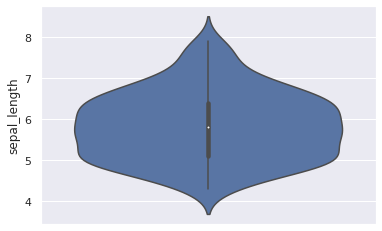

In [4]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
 
# Make boxplot for one group only
sns.violinplot(y=df["sepal_length"])
plt.show()

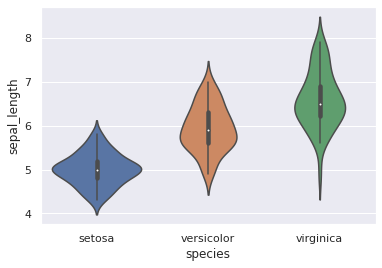

In [5]:
# plot
sns.violinplot(x=df["species"], y=df["sepal_length"] )
plt.show()

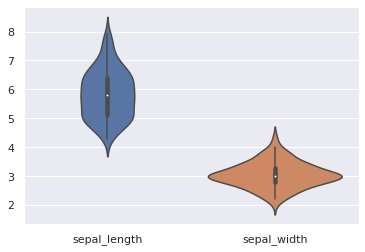

In [6]:
# plot
sns.violinplot(data=df.iloc[:,0:2])
plt.show()

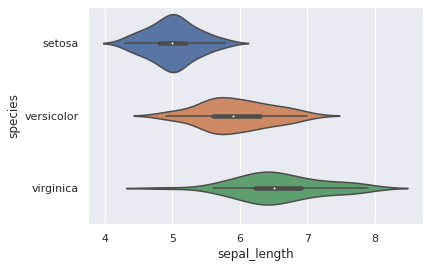

In [7]:
# Just switch x and y
sns.violinplot(y=df["species"], x=df["sepal_length"])
plt.show()

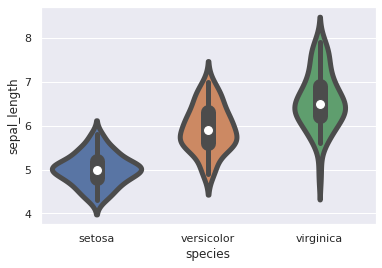

In [8]:
# Change line width
sns.violinplot(x=df["species"], y=df["sepal_length"], linewidth=5)
plt.show()

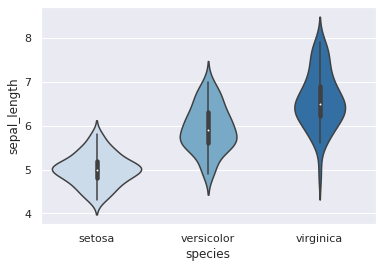

In [9]:
# Use a color palette
sns.violinplot(x=df["species"], y=df["sepal_length"], palette="Blues")
plt.show()

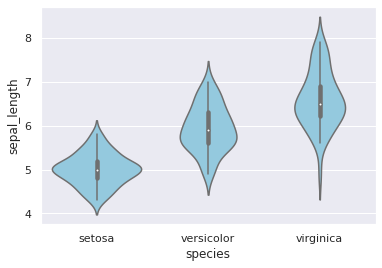

In [10]:
# plot
sns.violinplot(x=df["species"], y=df["sepal_length"], color="skyblue")
plt.show()

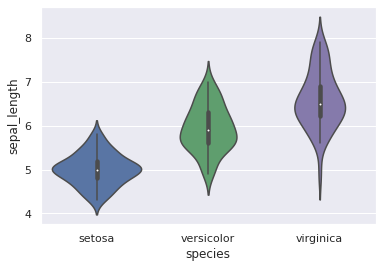

In [11]:
# creating a dictionary with one specific color per group:
my_pal = {"versicolor": "g", "setosa": "b", "virginica": "m"}
 
# plot it
sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
plt.show()

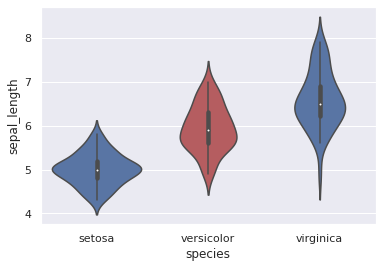

In [12]:
# creating a dictionary composed of species as keys and colors as values: red for the interesting group, blue for others
my_pal = {species: "r" if species == "versicolor" else "b" for species in df["species"].unique()}

# make the plot
sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
plt.show()

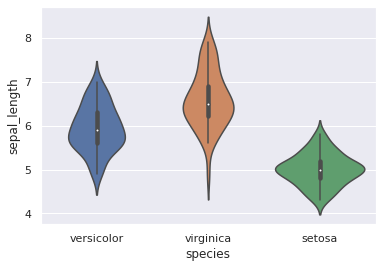

In [13]:
# specifying the group list as 'order' parameter and plotting
sns.violinplot(x='species', y='sepal_length', data=df, order=[ "versicolor", "virginica", "setosa"])
plt.show()

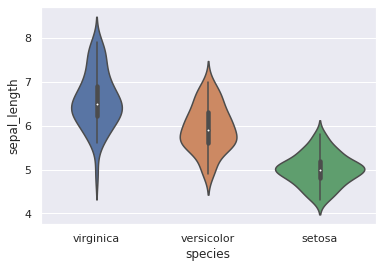

In [14]:
# Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index
 
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(x='species', y='sepal_length', data=df, order=my_order)
plt.show()

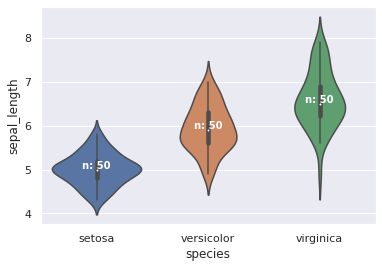

In [15]:
# Basic violinplot stored in a matplotlib.axes object
ax = sns.violinplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='w',
            weight='semibold')
plt.show()

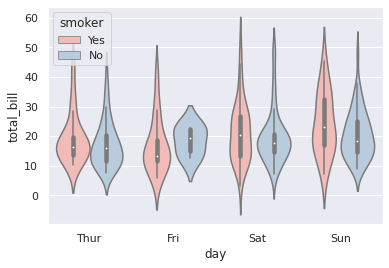

In [16]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('tips')
 
# Grouped violinplot
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df, palette="Pastel1")
plt.show()

## DENSITY CHART

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

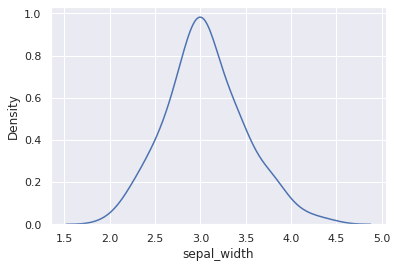

In [61]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

# Make default density plot
sns.kdeplot(df['sepal_width'])

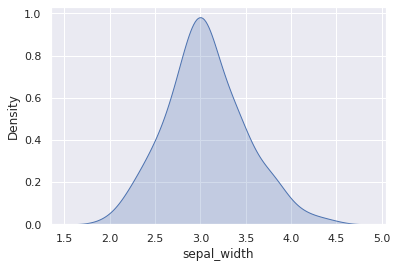

In [62]:
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(df['sepal_width'], shade=True)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


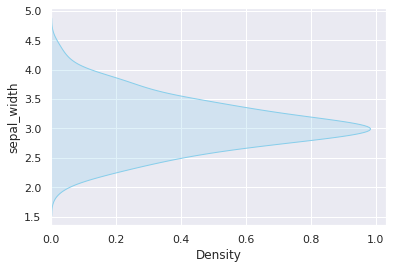

In [63]:
# setting 'vertical' parameter to True
sns.kdeplot(df['sepal_width'], shade=True, vertical=True, color="skyblue")
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


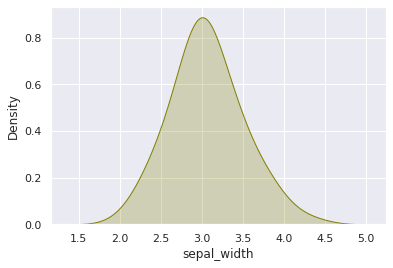

In [64]:
# Large bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=0.5, color="olive")
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


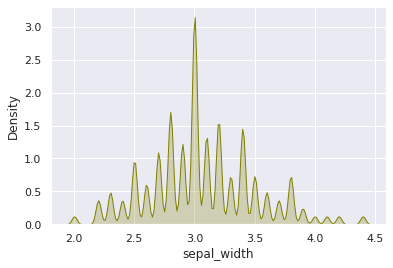

In [65]:
# Narrower bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=0.05, color='olive') # if using seaborn < 0.11.0
plt.show()

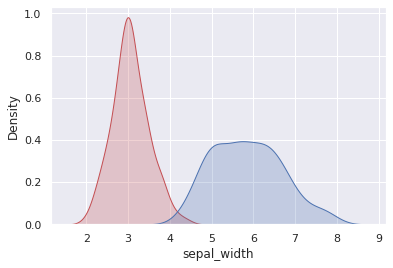

In [68]:
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.show()

NameError: name 'linspace' is not defined

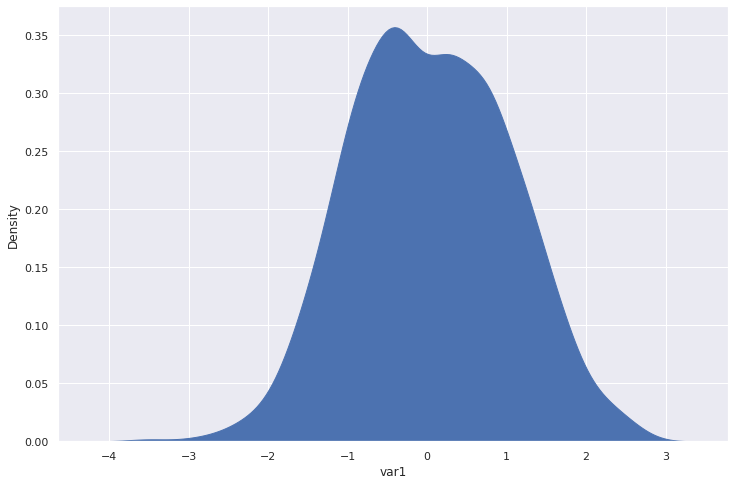

In [72]:
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(data=df, x="var1",  fill=True, alpha=1)

# plot density chart for var2
kde = gaussian_kde(df.var2)
x_range = linspace(min(df.var2), max(df.var2), len(df.var2))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange')

# add axis names        
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')

# show the graph
plt.show()

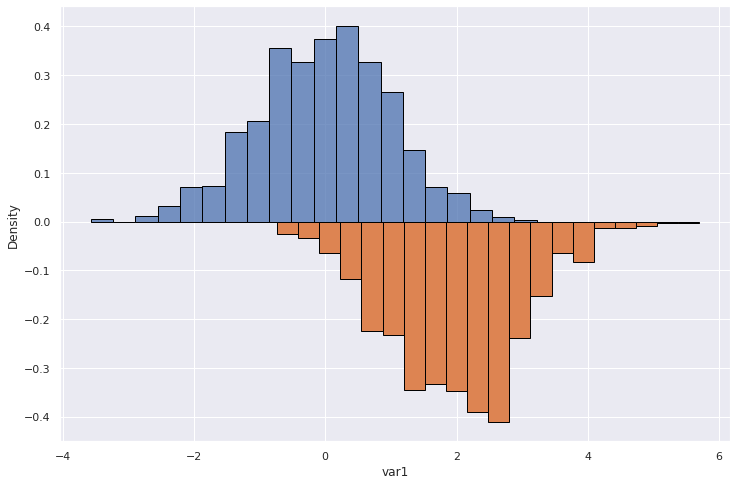

In [73]:
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df.var1, stat="density", bins=20, edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()

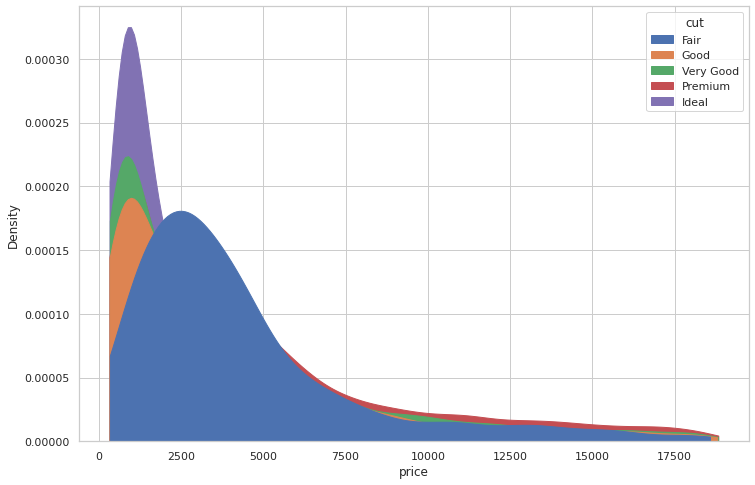

In [76]:
from plotnine.data import diamonds # dataset

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
sns.kdeplot(data=diamonds, x="price", hue="cut", cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

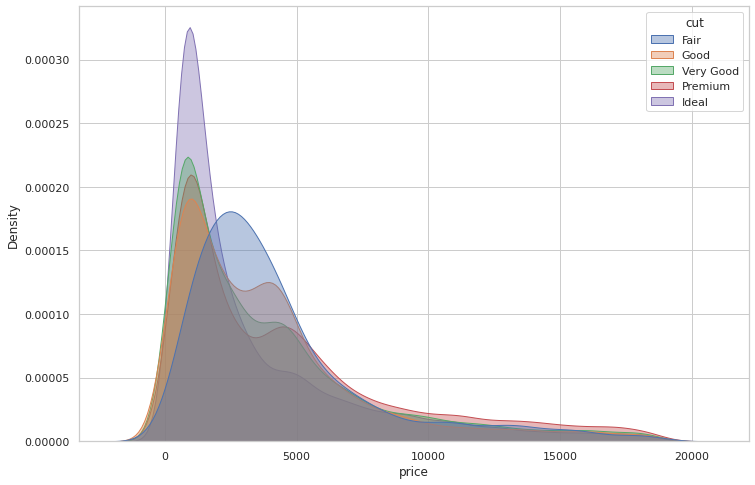

In [77]:
# With transparency
sns.kdeplot(data=diamonds, x="price", hue="cut", fill=True, common_norm=False, alpha=0.4)
plt.show()

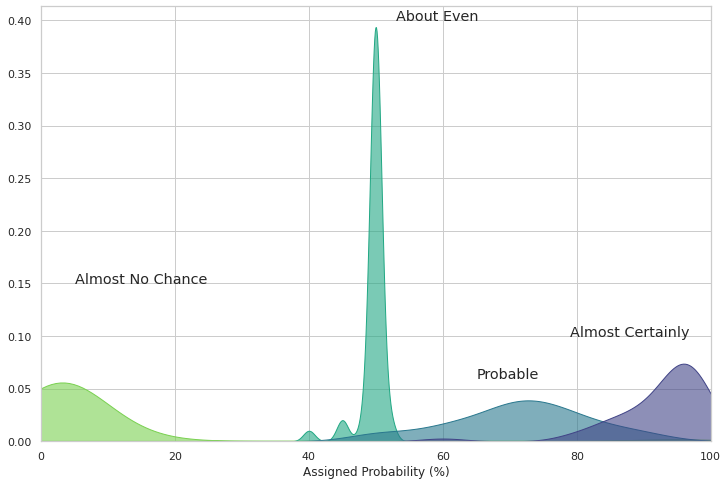

In [78]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# load dataset from github and convert it to a long format
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# take only "Almost No Chance", "About Even", "Probable", "Almost Certainly"
data = data.loc[data.text.isin(["Almost No Chance","About Even","Probable","Almost Certainly"])]

# density plot
p = sns.kdeplot(data=data, x="value", hue="text", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.xlim(0, 100)

# dataframe for annotations
annot = pd.DataFrame({
'x': [5, 53, 65, 79],
'y': [0.15, 0.4, 0.06, 0.1],
'text': ["Almost No Chance", "About Even", "Probable", "Almost Certainly"]
})

# add annotations one by one with a loop
for point in range(0,len(annot)):
     p.text(annot.x[point], annot.y[point], annot.text[point], horizontalalignment='left', size='large')

# add axis names        
plt.xlabel("Assigned Probability (%)")
plt.ylabel("")
        
# show the graph
plt.show()

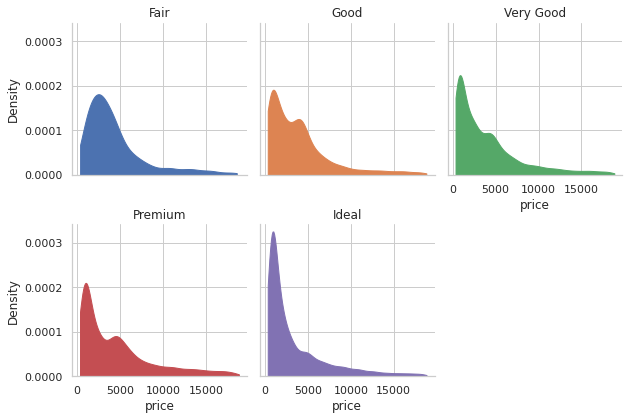

In [79]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

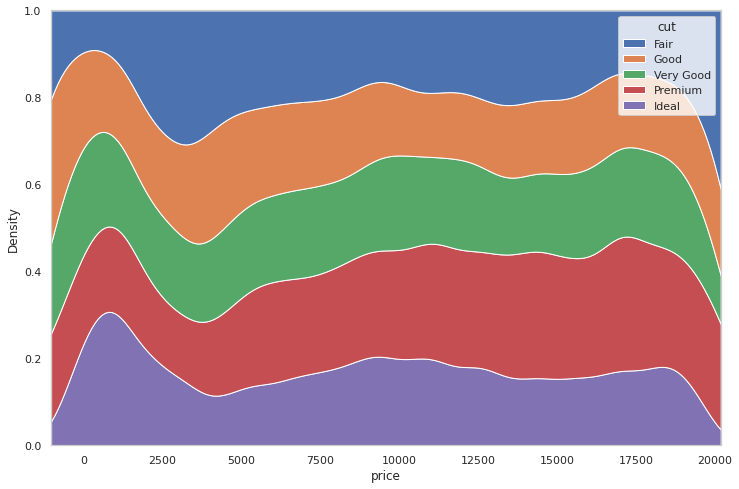

In [80]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# stacked density plot
sns.kdeplot(data=diamonds, x="price", hue="cut", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

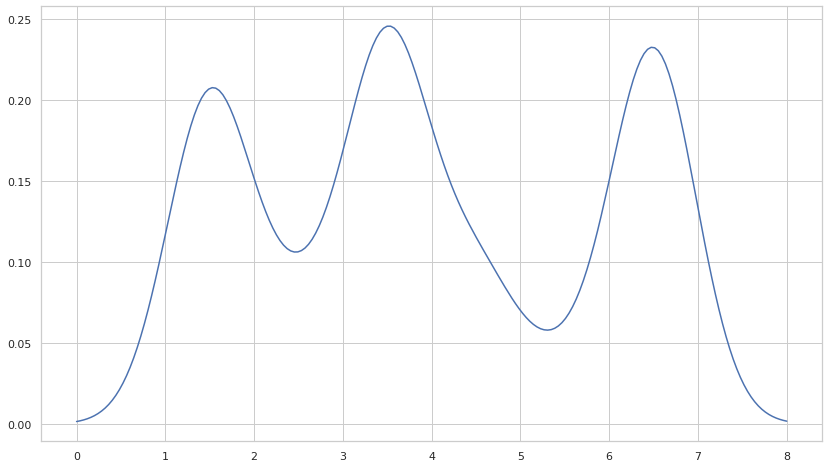

In [81]:
# Build dummy data
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 8, 200)

# Set the figure size
plt.figure(figsize=(14, 8))

# Make the chart
# We're actually building a line chart where x values are set all along the axis and y value are
# the corresponding values from the density function
plt.plot(xs,density(xs))
plt.show()

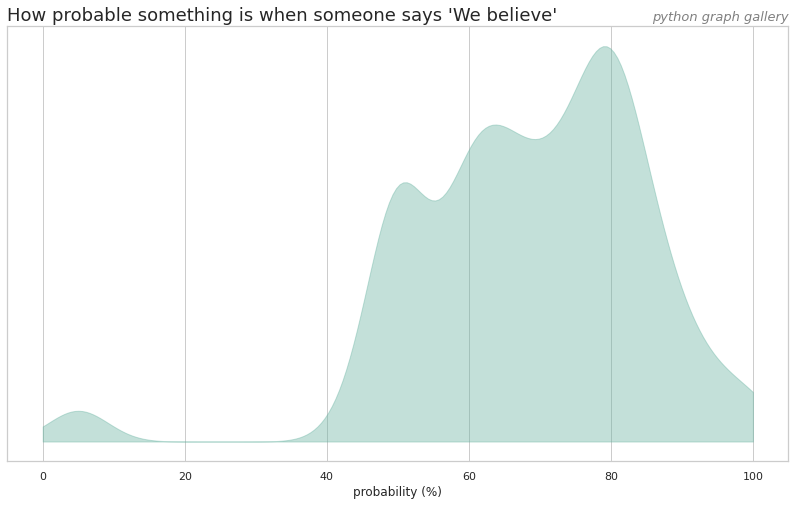

In [82]:
# load dataset from github and convert it to a long format
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# take only "Almost No Chance", "About Even", "Probable", "Almost Certainly"
data = data.loc[data.text.isin(["We Believe"])]

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data.value)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 100, 200)

# Set the figure size
plt.figure(figsize=(14,8))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.title("How probable something is when someone says 'We believe'", loc='left', fontsize=18)
plt.title("python graph gallery", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("probability (%)")

# Remove Y axis
plt.yticks([])

plt.show()

## HISTOGRAM

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length'>

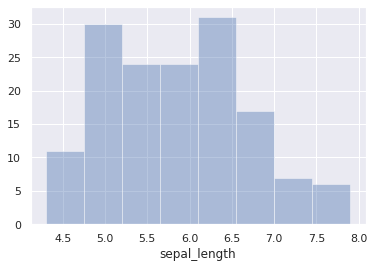

In [22]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False )

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

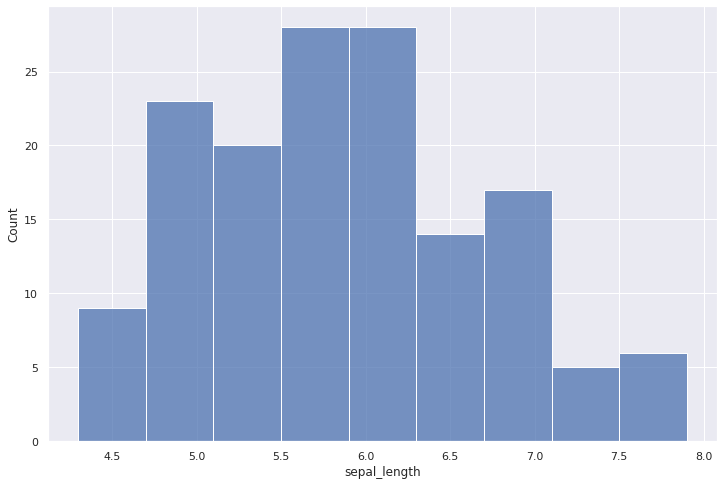

In [84]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns

sns.histplot(data=df, x="sepal_length")

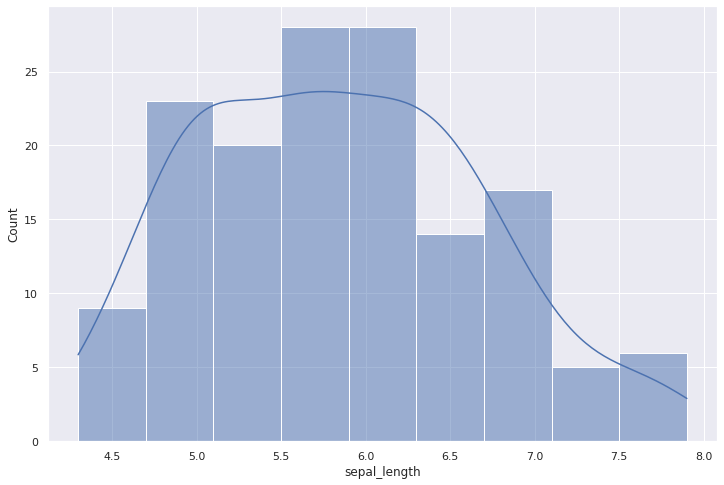

In [85]:
sns.histplot(data=df, x="sepal_length", kde=True)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


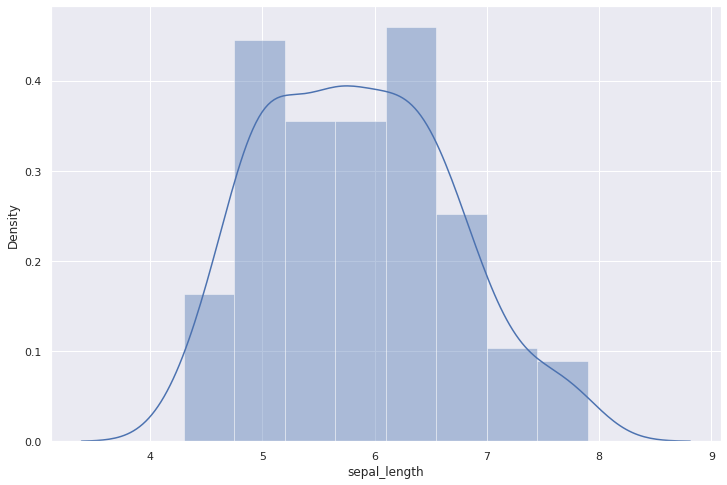

In [86]:
sns.distplot(df["sepal_length"])
# in the next version of the distplot function, one would have to write:
# sns.distplot(data=df, x="sepal_length", kind='hist') # note that 'kind' is 'hist' by default
plt.show()

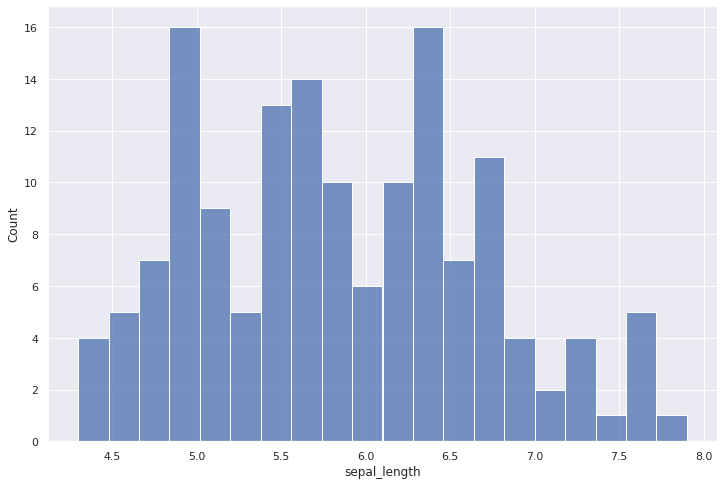

In [87]:
sns.histplot(data=df, x="sepal_length", bins=20)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


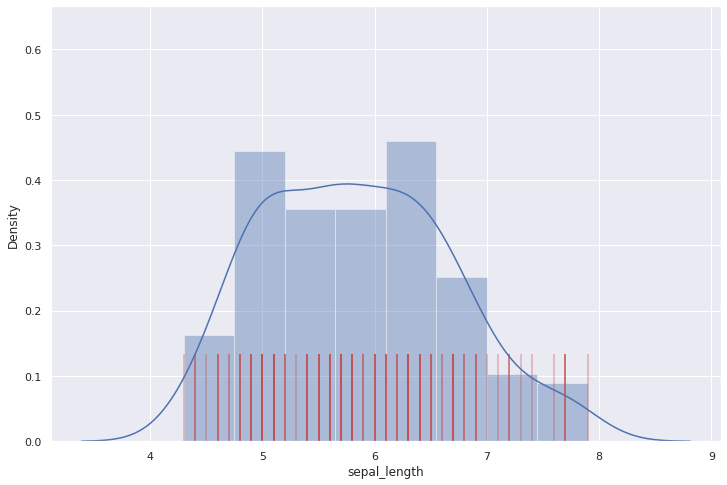

In [89]:
sns.distplot(df["sepal_length"],
             kde=True,
             rug=True,
             rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.2})
# in the next version of the distplot function, one would have to write:
# sns.distplot(data=df, x="sepal_length", kde=True, rug=True, rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2 })
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


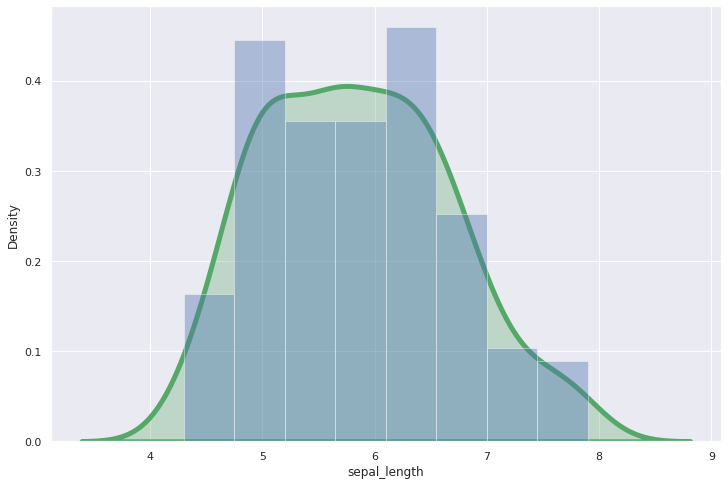

In [90]:
sns.distplot(df["sepal_length"],
             kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
# in the next version of the distplot function, one would have to write:
# sns.distplot(data=df, x="sepal_length", kde=True, kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


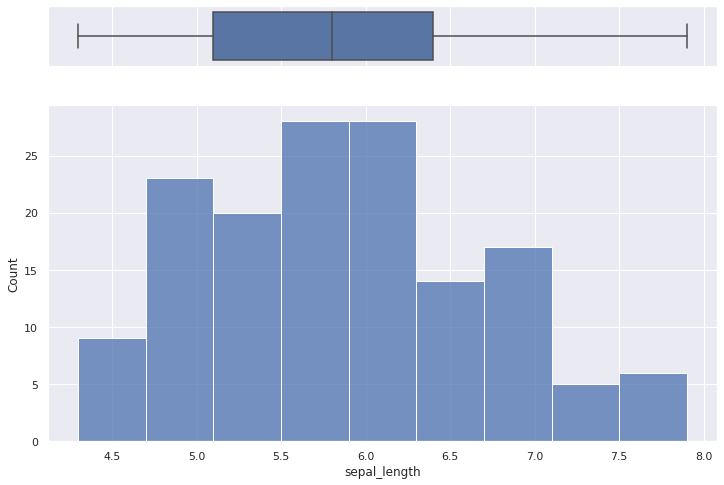

In [91]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.histplot(data=df, x="sepal_length", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

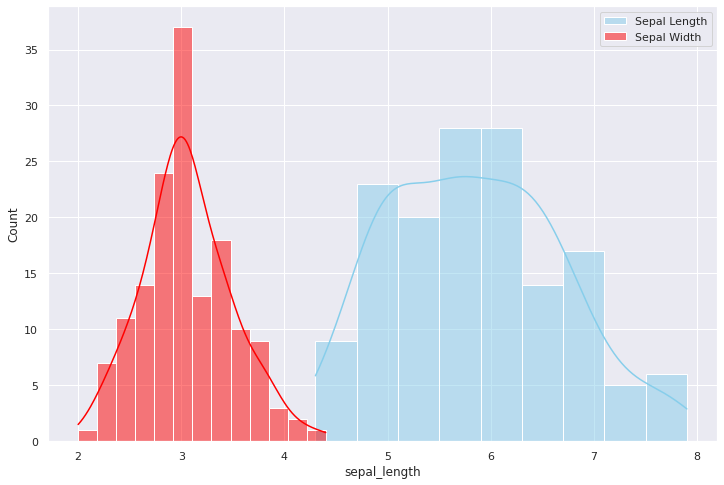

In [92]:
sns.histplot(data=df, x="sepal_length", color="skyblue", label="Sepal Length", kde=True)
sns.histplot(data=df, x="sepal_width", color="red", label="Sepal Width", kde=True)

plt.legend() 
plt.show()

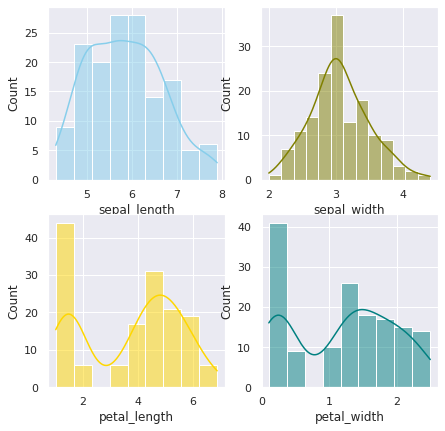

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

plt.show()

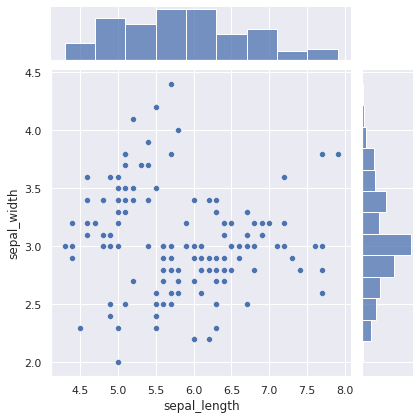

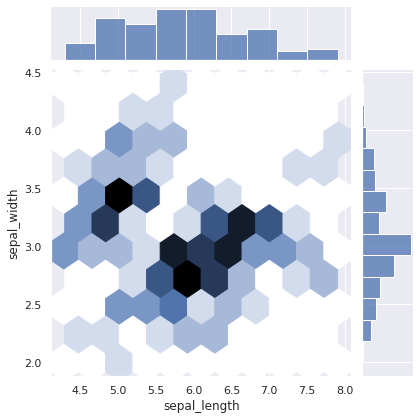

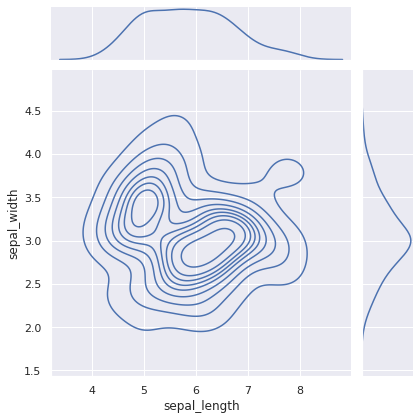

In [94]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')

plt.show()

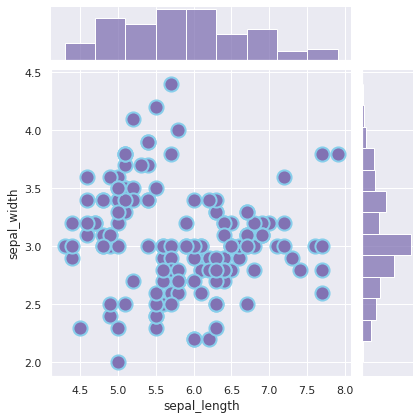

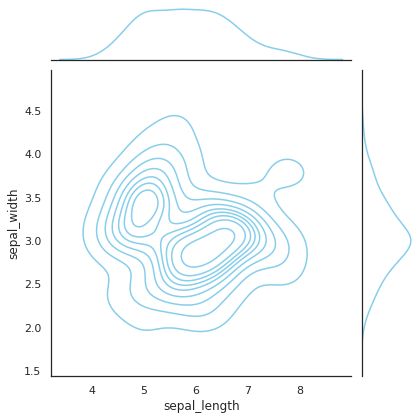

In [95]:
# Then you can pass arguments to each type:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="skyblue")

plt.show()

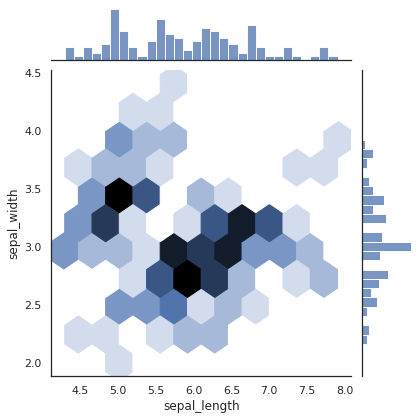

In [96]:
# Custom the histogram:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex', marginal_kws=dict(bins=30, fill=True))

plt.show()

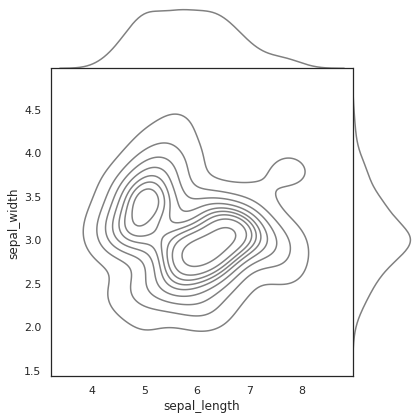

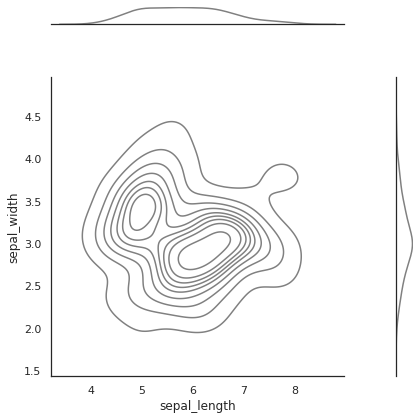

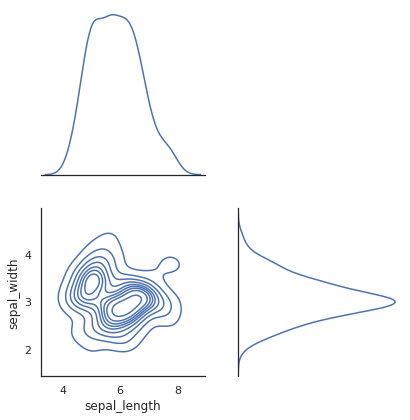

In [97]:
# No space
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="grey", space=0)
 
# Huge space
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="grey", space=3)
 
# Make marginal bigger:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde',ratio=1)

plt.show()

### BOXPLOT

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

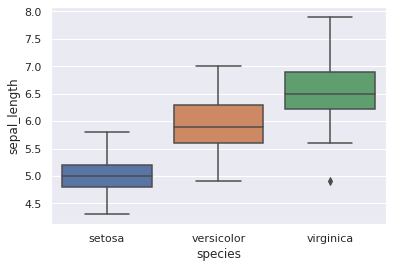

In [23]:
sns.boxplot( x=df["species"], y=df["sepal_length"] )

### RIDGELINE CHART

In [24]:
# libraries
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

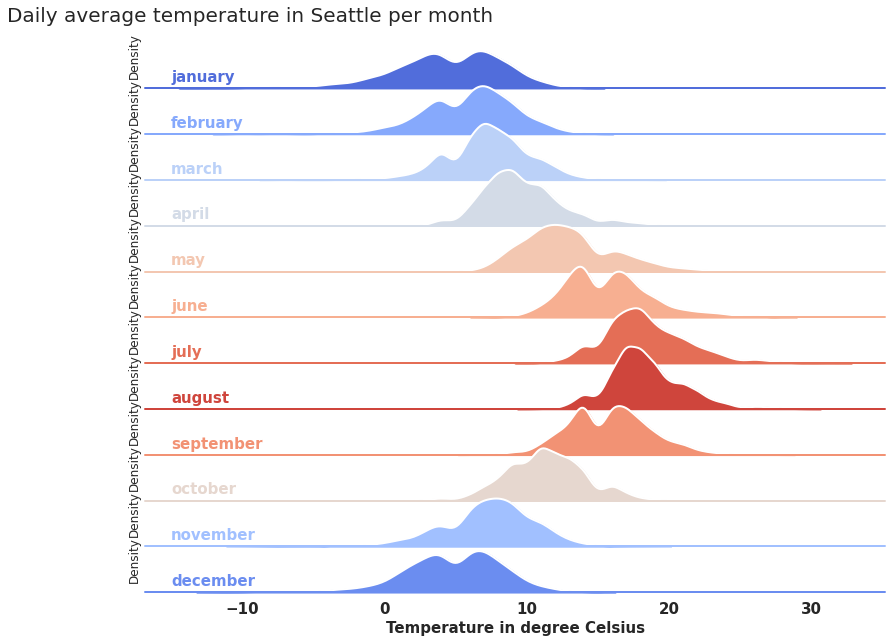

In [25]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

## CORRELATION

### SCATTERPLOT

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

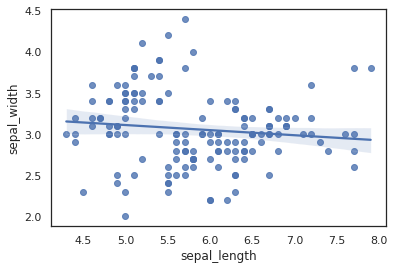

In [26]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])

### HEATMAP

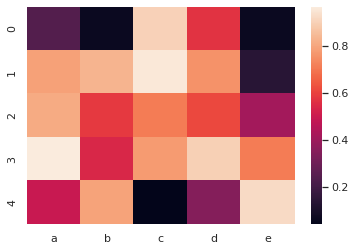

In [27]:
# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap
p1 = sns.heatmap(df)

### CORRELOGRAM

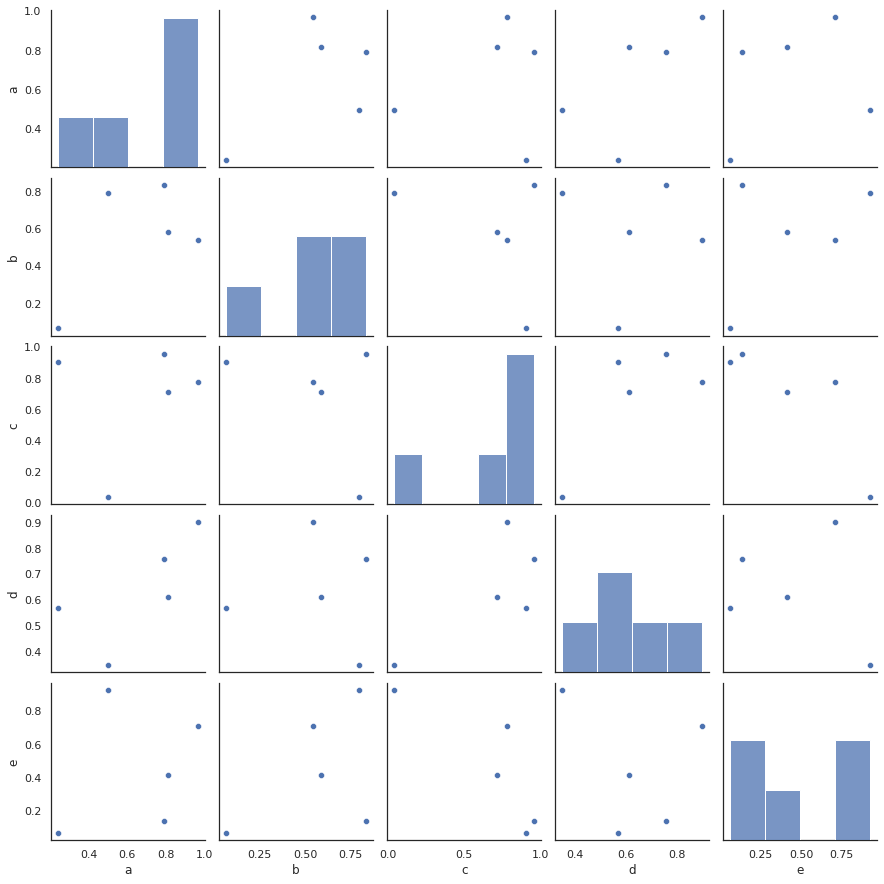

In [28]:
# Basic correlogram
sns.pairplot(df)
plt.show()

### BUBBLE PLOT

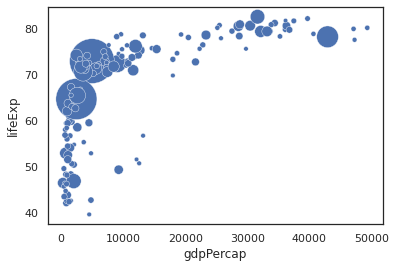

In [29]:
from gapminder import gapminder # data set

# data
data = gapminder.loc[gapminder.year == 2007]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

### CONNECTED SCATTERPLOT

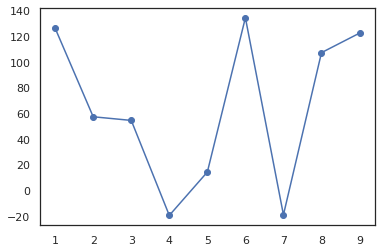

In [30]:
  # data
  df = pd.DataFrame({
      'x_axis': range(1,10),
      'y_axis': np.random.randn(9)*80+range(1,10)
  })

  # plot
  plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
  plt.show()

### 2D DENSITY CHART

In [31]:
# WIP

## RANKING

### BARPLOT

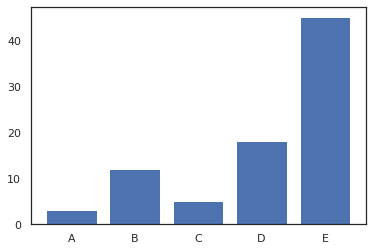

In [32]:
# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

### RADAR CHART

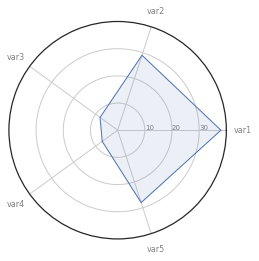

In [33]:
# Libraries
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

### WORDCLOUD

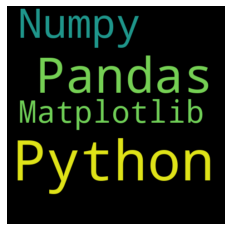

In [34]:
# Libraries
from wordcloud import WordCloud

# Create a list of word
text=("Python Python Python Python Matplotlib Pandas Pandas Pandas Numpy Numpy")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### PARALLEL COORDINATE PLOT

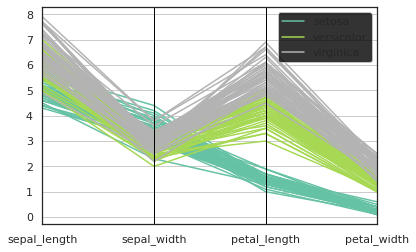

In [35]:
from pandas.plotting import parallel_coordinates

# Take the iris dataset
import seaborn as sns
data = sns.load_dataset('iris')

# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()

### LOLLIPOP PLOT

([<matplotlib.axis.XTick at 0x7fd678cc0cc0>,
 [Text(1, 0, 'L'),
  Text(2, 0, 'Q'),
  Text(3, 0, 'J'),
  Text(4, 0, 'F'),
  Text(5, 0, 'S'),
  Text(6, 0, 'C'),
  Text(7, 0, 'R'),
  Text(8, 0, 'T'),
  Text(9, 0, 'D'),
  Text(10, 0, 'B'),
  Text(11, 0, 'M'),
  Text(12, 0, 'G'),
  Text(13, 0, 'O'),
  Text(14, 0, 'H'),
  Text(15, 0, 'A'),
  Text(16, 0, 'N'),
  Text(17, 0, 'P'),
  Text(18, 0, 'E'),
  Text(19, 0, 'I'),
  Text(20, 0, 'K')])

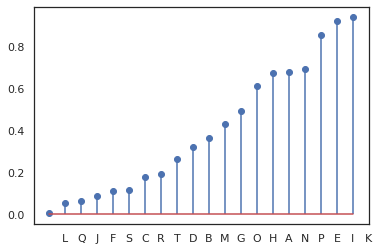

In [36]:
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

# Make the plot
plt.stem(ordered_df['values'])
plt.xticks( my_range, ordered_df['group'])

### CIRCULAR BARPLOT

In [37]:
# WIP

## PART OF A WHOLE

### TREEMAP

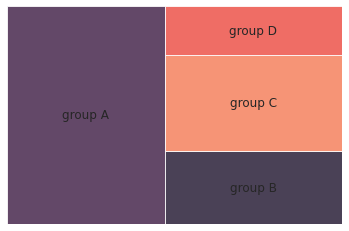

In [38]:
# libraries
import squarify

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

### VENN DIAGRAM

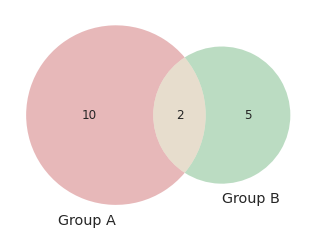

In [39]:
# library
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()

### DONUT

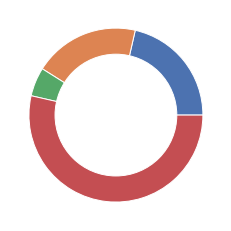

In [40]:
# create data
size_of_groups=[12,11,3,30]

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## PIE PLOT

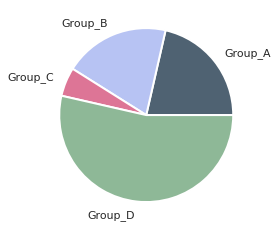

In [41]:
# create data: an array of values
names='Group_A', 'Group_B', 'Group_C', 'Group_D'
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
values=[12,11,3,30]

# Create a pieplot
plt.pie(size_of_groups)
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors = colors);
plt.show();

### DENDROGRAM

In [42]:
# WIP

### CIRCULAR PACKING

In [43]:
# WIP

## EVOLUTION

### LINE CHART

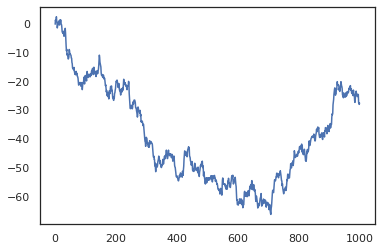

In [44]:
# create data
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)

### AREA CHART

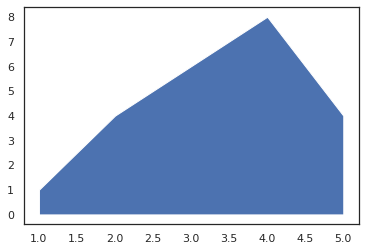

In [45]:
# Create data
x=range(1,6)
y=[1,4,6,8,4]

# Area plot
plt.fill_between(x, y)
plt.show()

### STACKED AREA CHART

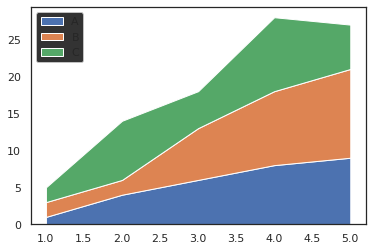

In [46]:
# Create data
x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]

# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

### STREAMGRAPH

In [47]:
# WIP

### TIMESERIES

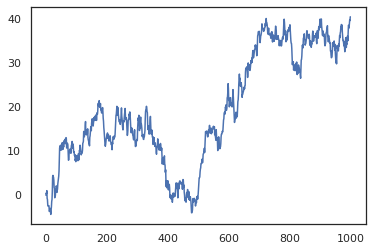

In [48]:
# create data
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)  

## MAP

### BACKGROUND MAP

In [49]:
# WIP

### CHOROPLETH MAP

In [50]:
# WIP

### HEXBIN MAP

In [51]:
# WIP

### CARTOGRAM

In [52]:
# WIP

### CONNECTION MAP

In [53]:
# WIP

### BUBBLE MAP

In [54]:
# WIP

## FLOW

### CHORD DIAGRAM

In [55]:
# WIP

### NETWORK CHART

In [56]:
# WIP

### SANKEY DIAGRAM

In [57]:
# WIP

### ARC DIAGRAM

In [58]:
# WIP

### HIERARCHICAL EDGE BUNDLING

In [59]:
# WIP